In [1]:
# 배열
import numpy as np

# 데이터 분석
import pandas as pd

In [2]:
# Pandas option 정의
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

In [3]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Jupyter note상에 그래프 결과 포함 매직 명령
%matplotlib inline

# Matplotlib 기본 글꼴 정의
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
# matplotlib 한글 출력을 위한 설정
import sys

!echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections

# 나눔 폰트를 설치합니다.
!sudo apt-get -qq -y install fonts-nanum
import matplotlib.font_manager as fm
font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
for fpath in font_files:
    fm.fontManager.addfont(fpath)

# 나눔바른고딕 폰트로 설정합니다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 마이너스 기호 표시 오류 수정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

debconf: DbDriver "passwords" warning: could not open /var/cache/debconf/passwords.dat: Permission denied
debconf: DbDriver "config": could not write /var/cache/debconf/config.dat-new: Permission denied


In [6]:
# 경고 문제 출력 제한
import warnings

warnings.filterwarnings( 'ignore' )

In [7]:
# Tensorflow
import tensorflow as tf

2024-09-12 02:37:40.402683: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-12 02:37:40.410679: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-12 02:37:40.437382: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-12 02:37:40.474925: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-12 02:37:40.486071: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-12 02:37:40.515600: I tensorflow/core/platform/cpu_feature_gu

In [8]:
# Tensorflow Sequential model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import optimizers

from tensorflow.keras.utils import plot_model

In [9]:
# 데이터 분리를 위한 함수
from sklearn.model_selection import train_test_split

In [10]:
def disp_training( history ):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range( 1, len( accuracy ) + 1 )

    plt.title( '훈련 및 검증 정확도' )
    plt.plot( epochs, history.history[ 'accuracy' ], label = 'accuracy' )
    plt.plot( epochs, history.history[ 'val_accuracy' ], label = 'val_accuracy' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.figure()
    plt.title( '훈련 및 검증 오차' )

    plt.plot( epochs, history.history[ 'loss' ], label = 'loss' )
    plt.plot( epochs, history.history[ 'val_loss' ], label = 'val_loss' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.show()

In [11]:
def disp_loss( history ):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range( 1, len( loss ) + 1 )

    plt.title( '훈련 및 검증 오차' )

    plt.plot( epochs, history.history[ 'loss' ], label = 'loss' )
    plt.plot( epochs, history.history[ 'val_loss' ], label = 'val_loss' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.show()

# 다중 클래스 분류 모델 생성에 Functional API 사용한 모델링 적용

## 데이터 준비

In [12]:
iris = sns.load_dataset( 'iris' )

## 데이터 분리

In [13]:
X = iris.iloc[ :, 0:4 ].values # 입력 데이터
y = iris.iloc[ :, 4 ].values # 정답 데이터

## Label에 대한 One-hot encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() # 정수 인코딩 객체 생성
y_encoder = encoder.fit_transform( y ) # 문자열을 정수로 encoding

In [15]:
y = tf.keras.utils.to_categorical( y_encoder ) # One-hot encoding 수행 함수

## 훈련/테스트 데이터 분리

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

## 모델링 - Functional API

In [24]:
inputs = Input( shape = ( 4, ), name = 'Input' ) # 입력층에 해당하는 객체 생성
x = Dense( 64, activation = 'relu', name = 'Hidden1' )( inputs ) # input에 연결된 Dense 객체 생성
x = Dense( 32, activation = 'relu', name = 'Hidden2' )( x ) # hidden1에 연결된 Dense 객체 생성
outputs = Dense( 3, activation = 'softmax', name = 'Output' )( x ) # hidden2에 연결된 출력층 성결의 Dense 객체 생성

model = Model( inputs = [ inputs, ], outputs = [ outputs, ] ) # 신경망 모델 생성

In [25]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden1 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
adam = optimizers.Adam()

model.compile( loss = 'categorical_crossentropy',
               optimizer = adam,
               metrics = [ 'accuracy' ] )

history = model.fit( X_train, y_train, epochs = 100,
                     batch_size = 32,
                     validation_split = 0.2 )

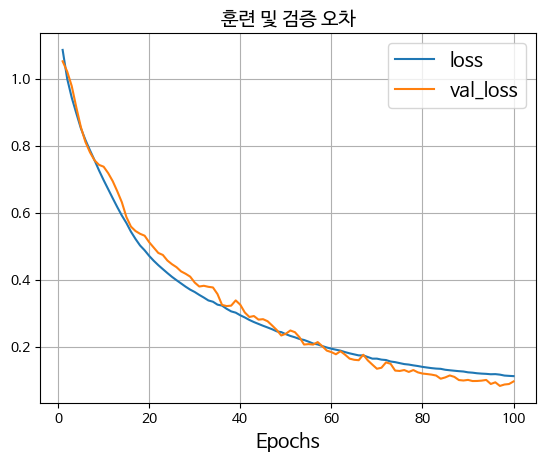

In [22]:
disp_loss( history )

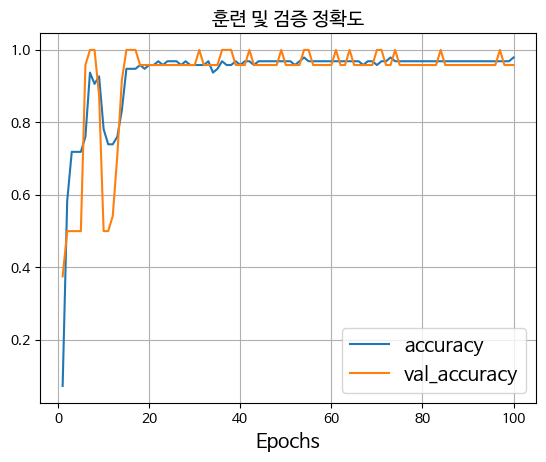

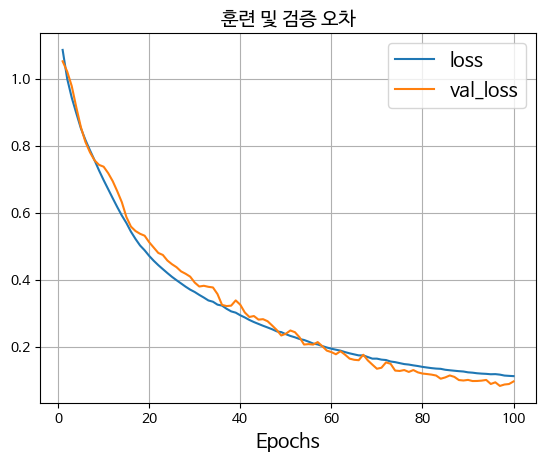

In [23]:
disp_training( history )

## Tensorboard 사용

1. Tensorboar 사용을 위한 event file 저장 위치 정의

In [28]:
from pathlib import Path
from time import strftime

def get_run_logdir( root_logdir = 'logs' ):
    return Path( root_logdir )/strftime( 'run_%Y_%m_%d_%H_%M_%S' )

In [29]:
run_dir = get_run_logdir()

In [30]:
run_dir

PosixPath('logs/run_2024_09_12_03_22_09')

2. Tensorboard Callback 함수 정의

In [32]:
tensorboard_cb = tf.keras.callbacks.TensorBoard( run_dir )

3. 모델 훈련

In [34]:
adam = optimizers.Adam()

model.compile( loss = 'categorical_crossentropy',
               optimizer = adam,
               metrics = [ 'accuracy' ] )

In [35]:
run_dir = get_run_logdir()
model.fit( X_train, y_train, epochs = 100,
              batch_size = 32,
              validation_split = 0.2,
              callbacks = [ tensorboard_cb ] 
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.3568 - loss: 1.2655 - val_accuracy: 0.2917 - val_loss: 1.2012
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3568 - loss: 1.1600 - val_accuracy: 0.2917 - val_loss: 1.1139
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2891 - loss: 1.0920 - val_accuracy: 0.5833 - val_loss: 1.0393
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5924 - loss: 1.0288 - val_accuracy: 0.7083 - val_loss: 0.9645
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6276 - loss: 0.9730 - val_accuracy: 0.7083 - val_loss: 0.9247
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6172 - loss: 0.9211 - val_accuracy: 0.3333 - val_loss: 0.8985
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5482 - loss: 0.8909 - val_accuracy: 0.5000 - val_loss: 0.8772
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7500 - loss: 0.8393 - val_accuracy: 0.5000 - val_loss

4. Tensorboard 실행

In [36]:
%load_ext tensorboard
%tensorboard --logdir=./logs

# Perceptron 원리 이해

* AND gate

In [37]:
def AND_gate( X1, X2 ):
    # weight( 가중치 )
    w1 = 0.5
    w2 = 0.5

    # bias
    b = -0.7

    # 입력값에 대한 연산
    result = X1 * w1 + X2 * w2 + b

    # 임계값에 따라 y 결정( 활성화 함수 역활 )
    if result <= 0:
        return 0
    else:
        return 1

In [38]:
AND_gate( 0, 0 ), AND_gate( 0, 1 ), AND_gate( 1, 0 ), AND_gate( 1, 1 )

(0, 0, 0, 1)

In [39]:
def NAND_gate( X1, X2 ):
    w1 = -0.5
    w2 = -0.5
    b = 0.7

    result = X1 * w1 + X2 * w2 + b

    if result <= 0:
        return 0
    else:
        return 1

In [40]:
NAND_gate( 0, 0 ), NAND_gate( 0, 1 ), NAND_gate( 1, 0 ), NAND_gate( 1, 1 )

(1, 1, 1, 0)

In [44]:
def OR_gate( X1, X2 ):
    w1 = 0.6
    w2 = 0.6
    b = -0.5

    result = X1 * w1 + X2 * w2 + b

    if result <= 0:
        return 0
    else:
        return 1

In [45]:
OR_gate( 0, 0 ), OR_gate( 0, 1 ), OR_gate( 1, 0 ), OR_gate( 1, 1 )

(0, 1, 1, 1)

In [50]:
def XOR_gate( X1, X2 ):
    w1 = 0.6
    w2 = 0.6
    b = -0.5

    result = X1 * w1 + X2 * w2 + b

    if result <= 0:
        return 0
    else:
        return 1

In [51]:
XOR_gate( 0, 0 ), XOR_gate( 0, 1 ), XOR_gate( 1, 0 ), XOR_gate( 1, 1 )

(0, 1, 1, 1)

## 다층 퍼셉트론을 활용한 XOR

In [52]:
def XOR_gate( X1, X2 ): # 입력층
    # 은닉층
    s1 = NAND_gate( X1, X2 )
    s2 = OR_gate( X1, X2 )

    # 출력층
    y = AND_gate( s1, s2 )

    return y

In [53]:
XOR_gate( 0, 0 ), XOR_gate( 0, 1 ), XOR_gate( 1, 0 ), XOR_gate( 1, 1 )

(0, 1, 1, 0)

## 활성화 함수

* 계단 함수

In [56]:
def step( X ):
    return np.array( X > 0, dtype = np.int16 )

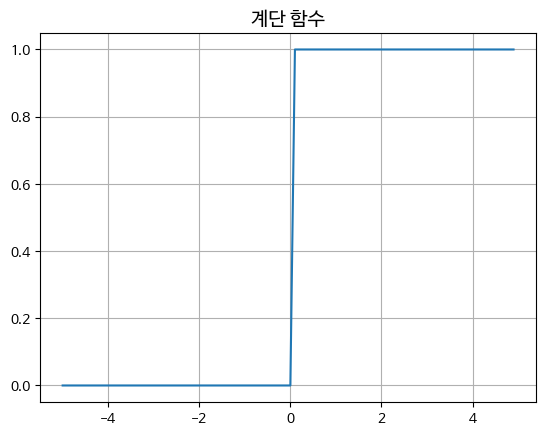

In [58]:
X = np.arange( -5.0, 5.0, 0.1 )
y = step( X )

plt.title( '계단 함수' )
plt.plot( X, y )
plt.grid()

plt.show()

* Sigmoid 함수

In [59]:
def sigmoid( X ):
    return 1 / ( 1 + np.exp( -X ) )

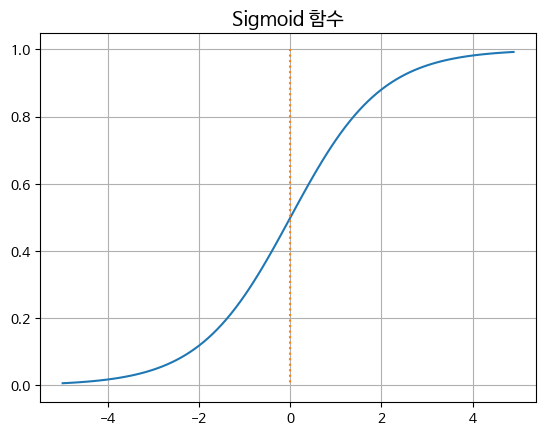

In [61]:
X = np.arange( -5.0, 5.0, 0.1 )
y = sigmoid( X )

plt.title( 'Sigmoid 함수' )
plt.plot( X, y )
plt.plot( [ 0, 0 ], [ 1.0, 0.0 ], ':' )
plt.grid()

plt.show()

w( 가중치 ) 변화에 따른 그래프

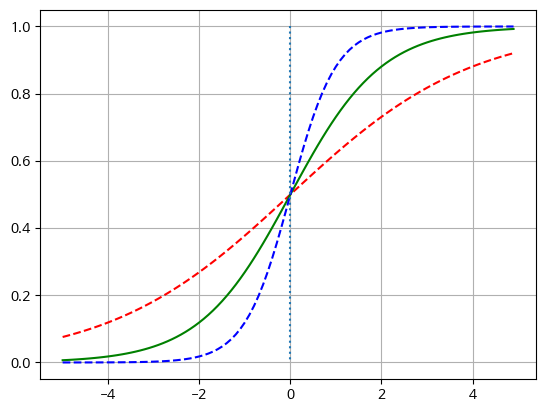

In [62]:
y1 = sigmoid( 0.5 * X )
y2 = sigmoid( X )
y3 = sigmoid( 2 * X )

plt.plot( X, y1, 'r', linestyle = '--' ) # red
plt.plot( X, y2, 'g' ) # green
plt.plot( X, y3, 'b', linestyle = '--' ) # blue
plt.plot( [ 0, 0 ], [ 1.0, 0.0 ], ':' )
plt.grid()

plt.show()

* b( bias ) 변화에 따른 그래프

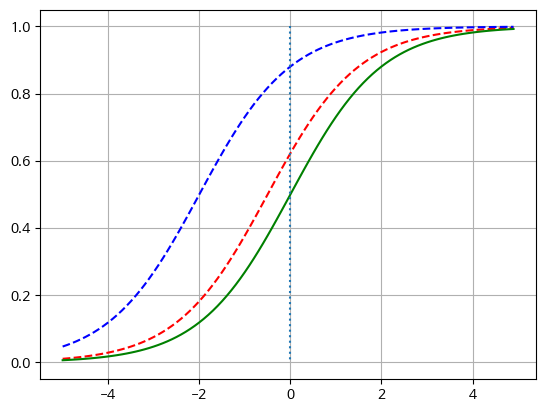

In [63]:
y1 = sigmoid( 0.5 + X )
y2 = sigmoid( X )
y3 = sigmoid( 2 + X )

plt.plot( X, y1, 'r', linestyle = '--' )
plt.plot( X, y2, 'g' )
plt.plot( X, y3, 'b', linestyle = '--' )
plt.plot( [ 0, 0 ], [ 1.0, 0.0 ], ':' )
plt.grid()

plt.show()

* 하이퍼볼릭탄젠트( tanh )

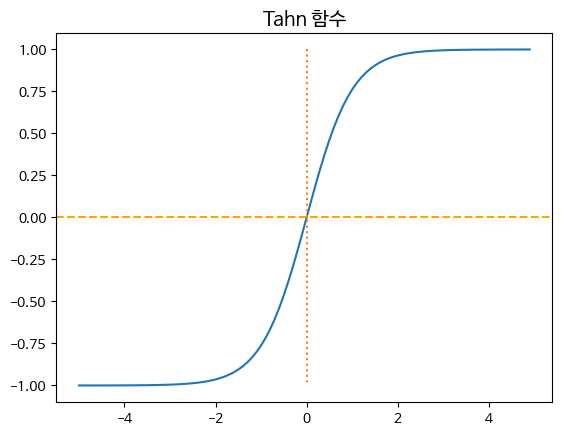

In [64]:
X = np.arange( -5.0, 5.0, 0.1 )
y = np.tanh( X )

plt.plot( X, y )
plt.plot( [ 0, 0 ], [ 1.0, -1.0 ], ':' )
plt.axhline( y = 0, color = 'orange', linestyle = '--' )
plt.title( 'Tahn 함수' )

plt.show()

* ReLU 함수

In [65]:
def relu( X ):
    return np.maximum( 0, X )

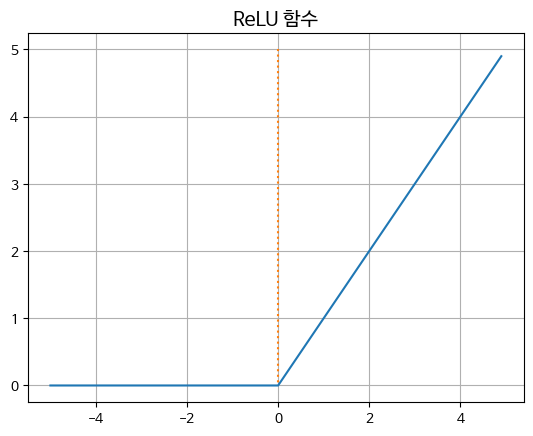

In [66]:
X = np.arange( -5.0, 5.0, 0.1 )
y = relu( X )

plt.plot( X, y )
plt.plot( [ 0, 0 ], [ 5.0, 0.0 ], ':' )
plt.title( 'ReLU 함수' )
plt.grid()

plt.show()

* Leaky LeLU 함수

In [67]:
alpha = 0.1

In [68]:
def leaky_relu( X ):
    return np.maximum( alpha * X, X )

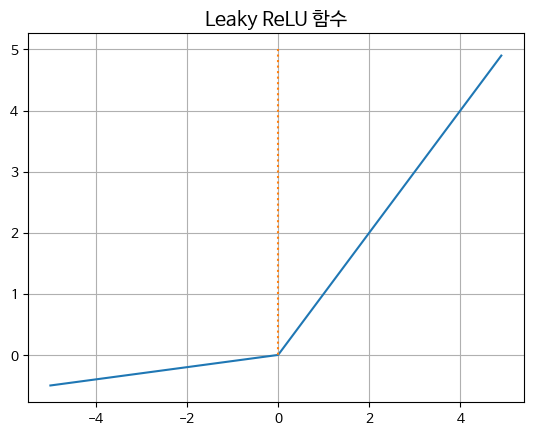

In [69]:
X = np.arange( -5.0, 5.0, 0.1 )
y = leaky_relu( X )

plt.plot( X, y )
plt.plot( [ 0, 0 ], [ 5.0, 0.0 ], ':' )
plt.title( 'Leaky ReLU 함수' )
plt.grid()

plt.show()